# Random Forest

## import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the Datasets

In [3]:
from google.colab import drive
drive.mount('colab')

Mounted at colab


In [4]:
df = pd.read_csv('/content/colab/MyDrive/colab/winequality-red.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Putting Feature Variable to X and Target variable to y

In [34]:
# Putting feature variable to X
X = df.drop('quality',axis=1)
# Putting response variable to y
y = df['quality']

## Train-Test-Split is performed

In [9]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [10]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((1119, 11), (480, 11))

## Import RandomForestClassifier and fit the data

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [13]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 303 ms, sys: 40.2 ms, total: 343 ms
Wall time: 292 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
# checking the oob score
classifier_rf.oob_score_

0.6237712243074174

## Hyperparameter tuning for Random Forest using GridSearchCV and fit the data

In [15]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [16]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [19]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min


CPU times: user 3.53 s, sys: 137 ms, total: 3.67 s
Wall time: 1min 56s


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.9min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [20]:
grid_search.best_score_

0.6479070660522274

In [21]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [26]:
y.unique()

array([5, 6, 7, 4, 8, 3])

## visualize

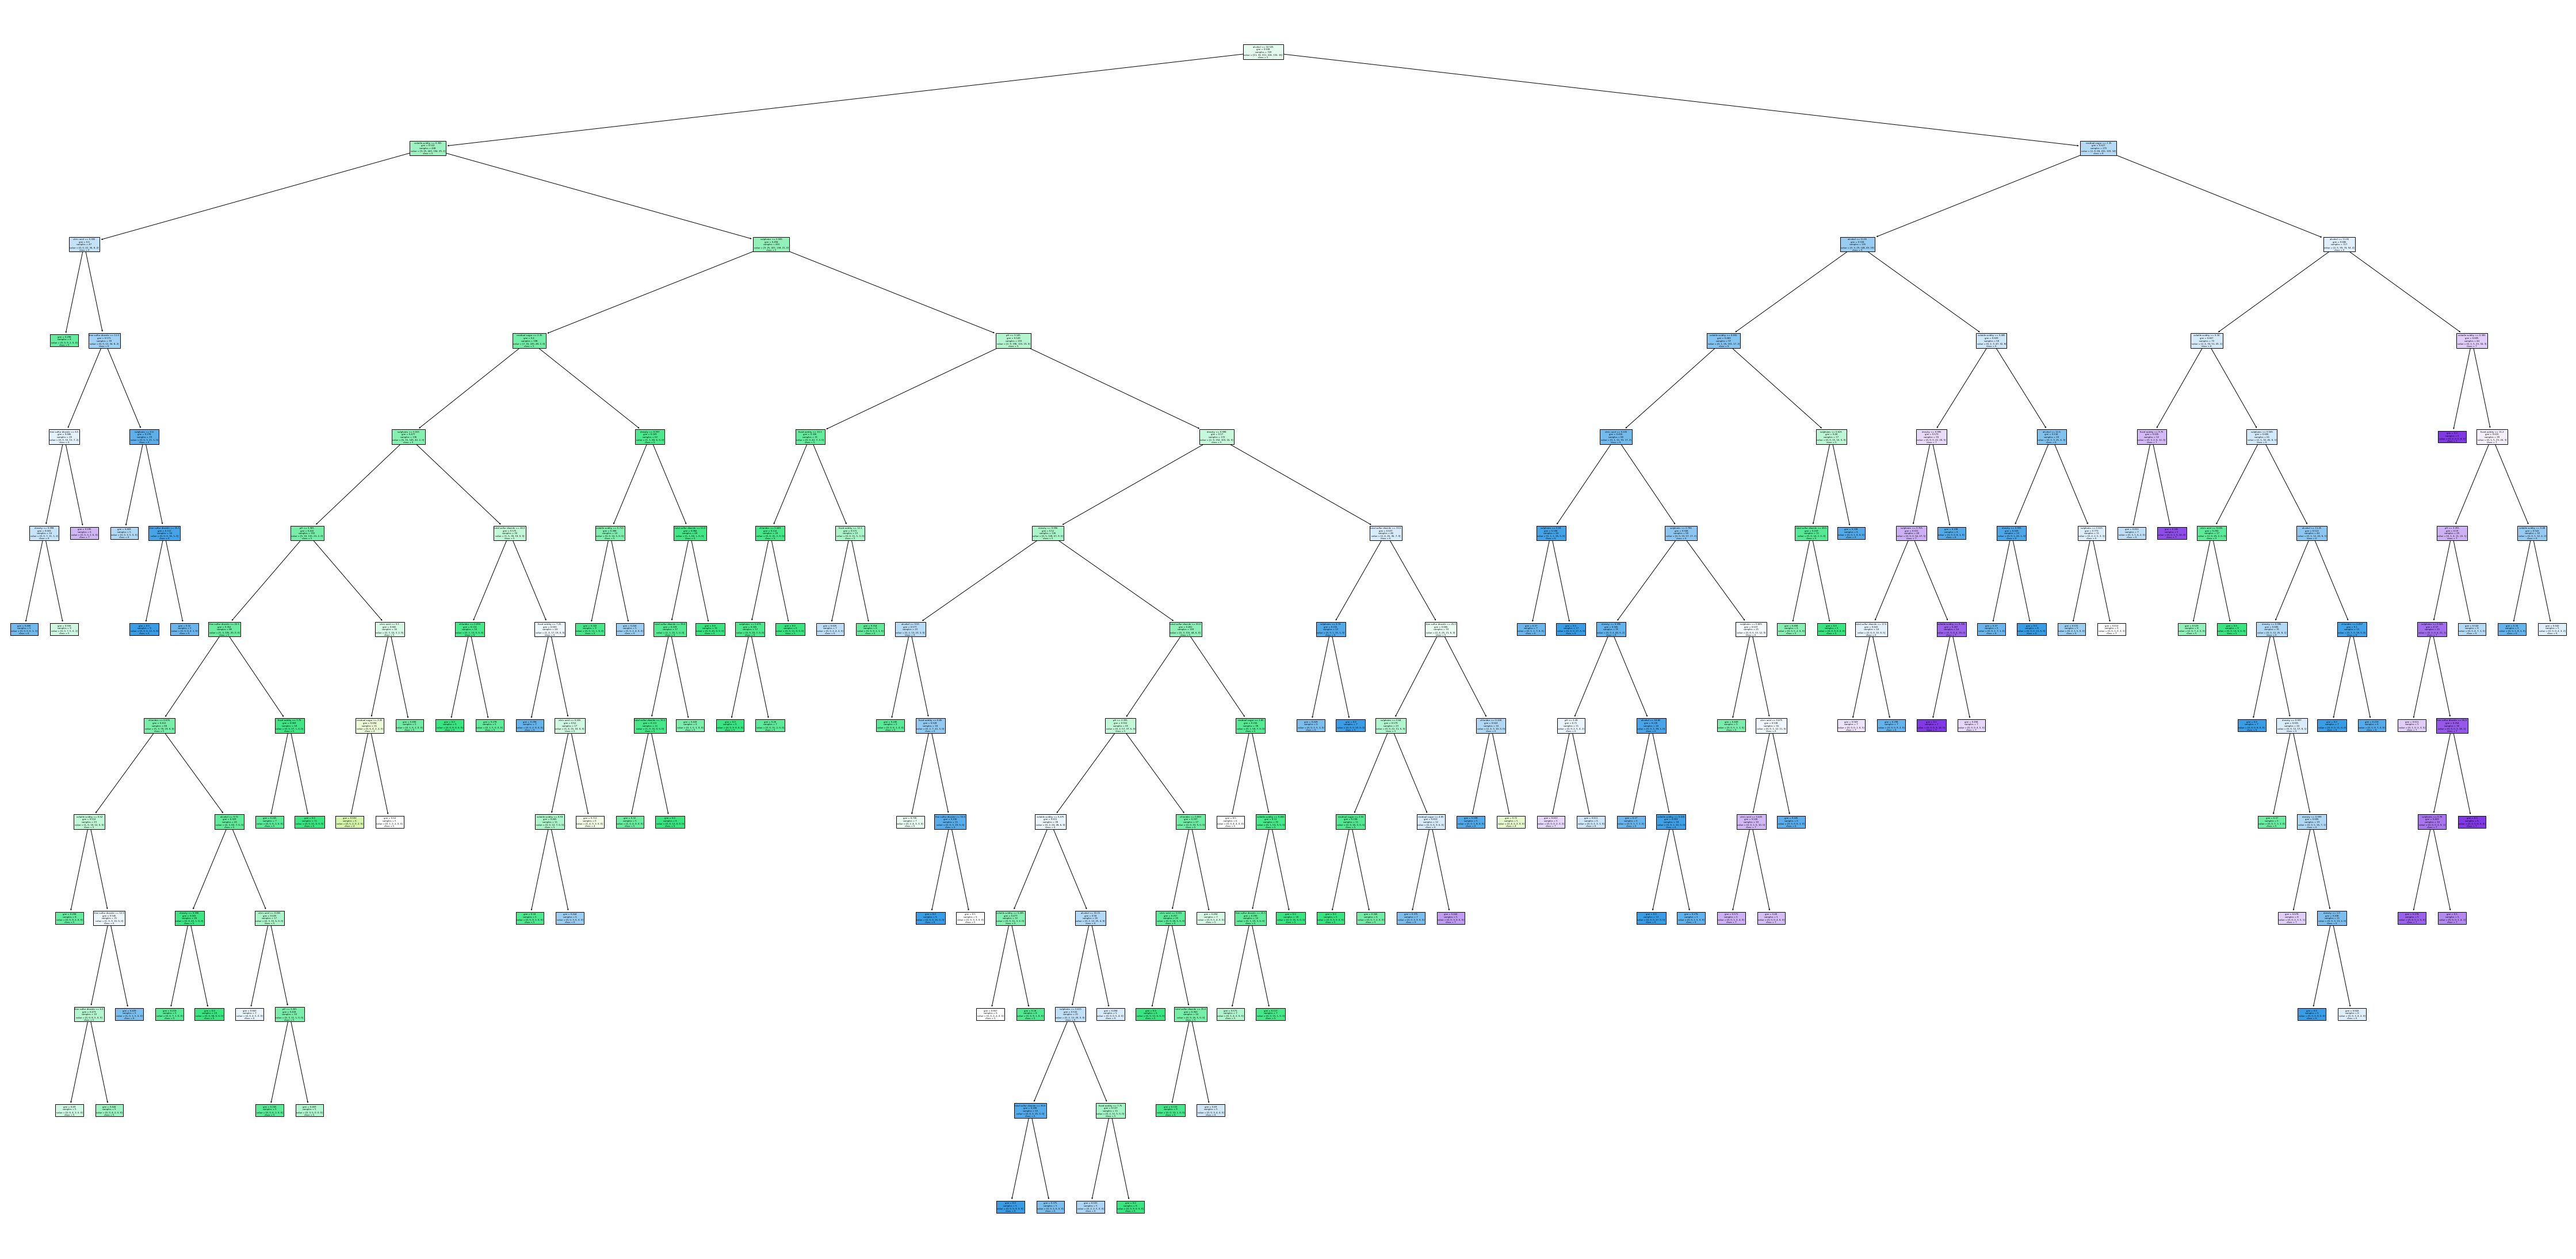

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['3','4','5','6','7',"8"],filled=True);

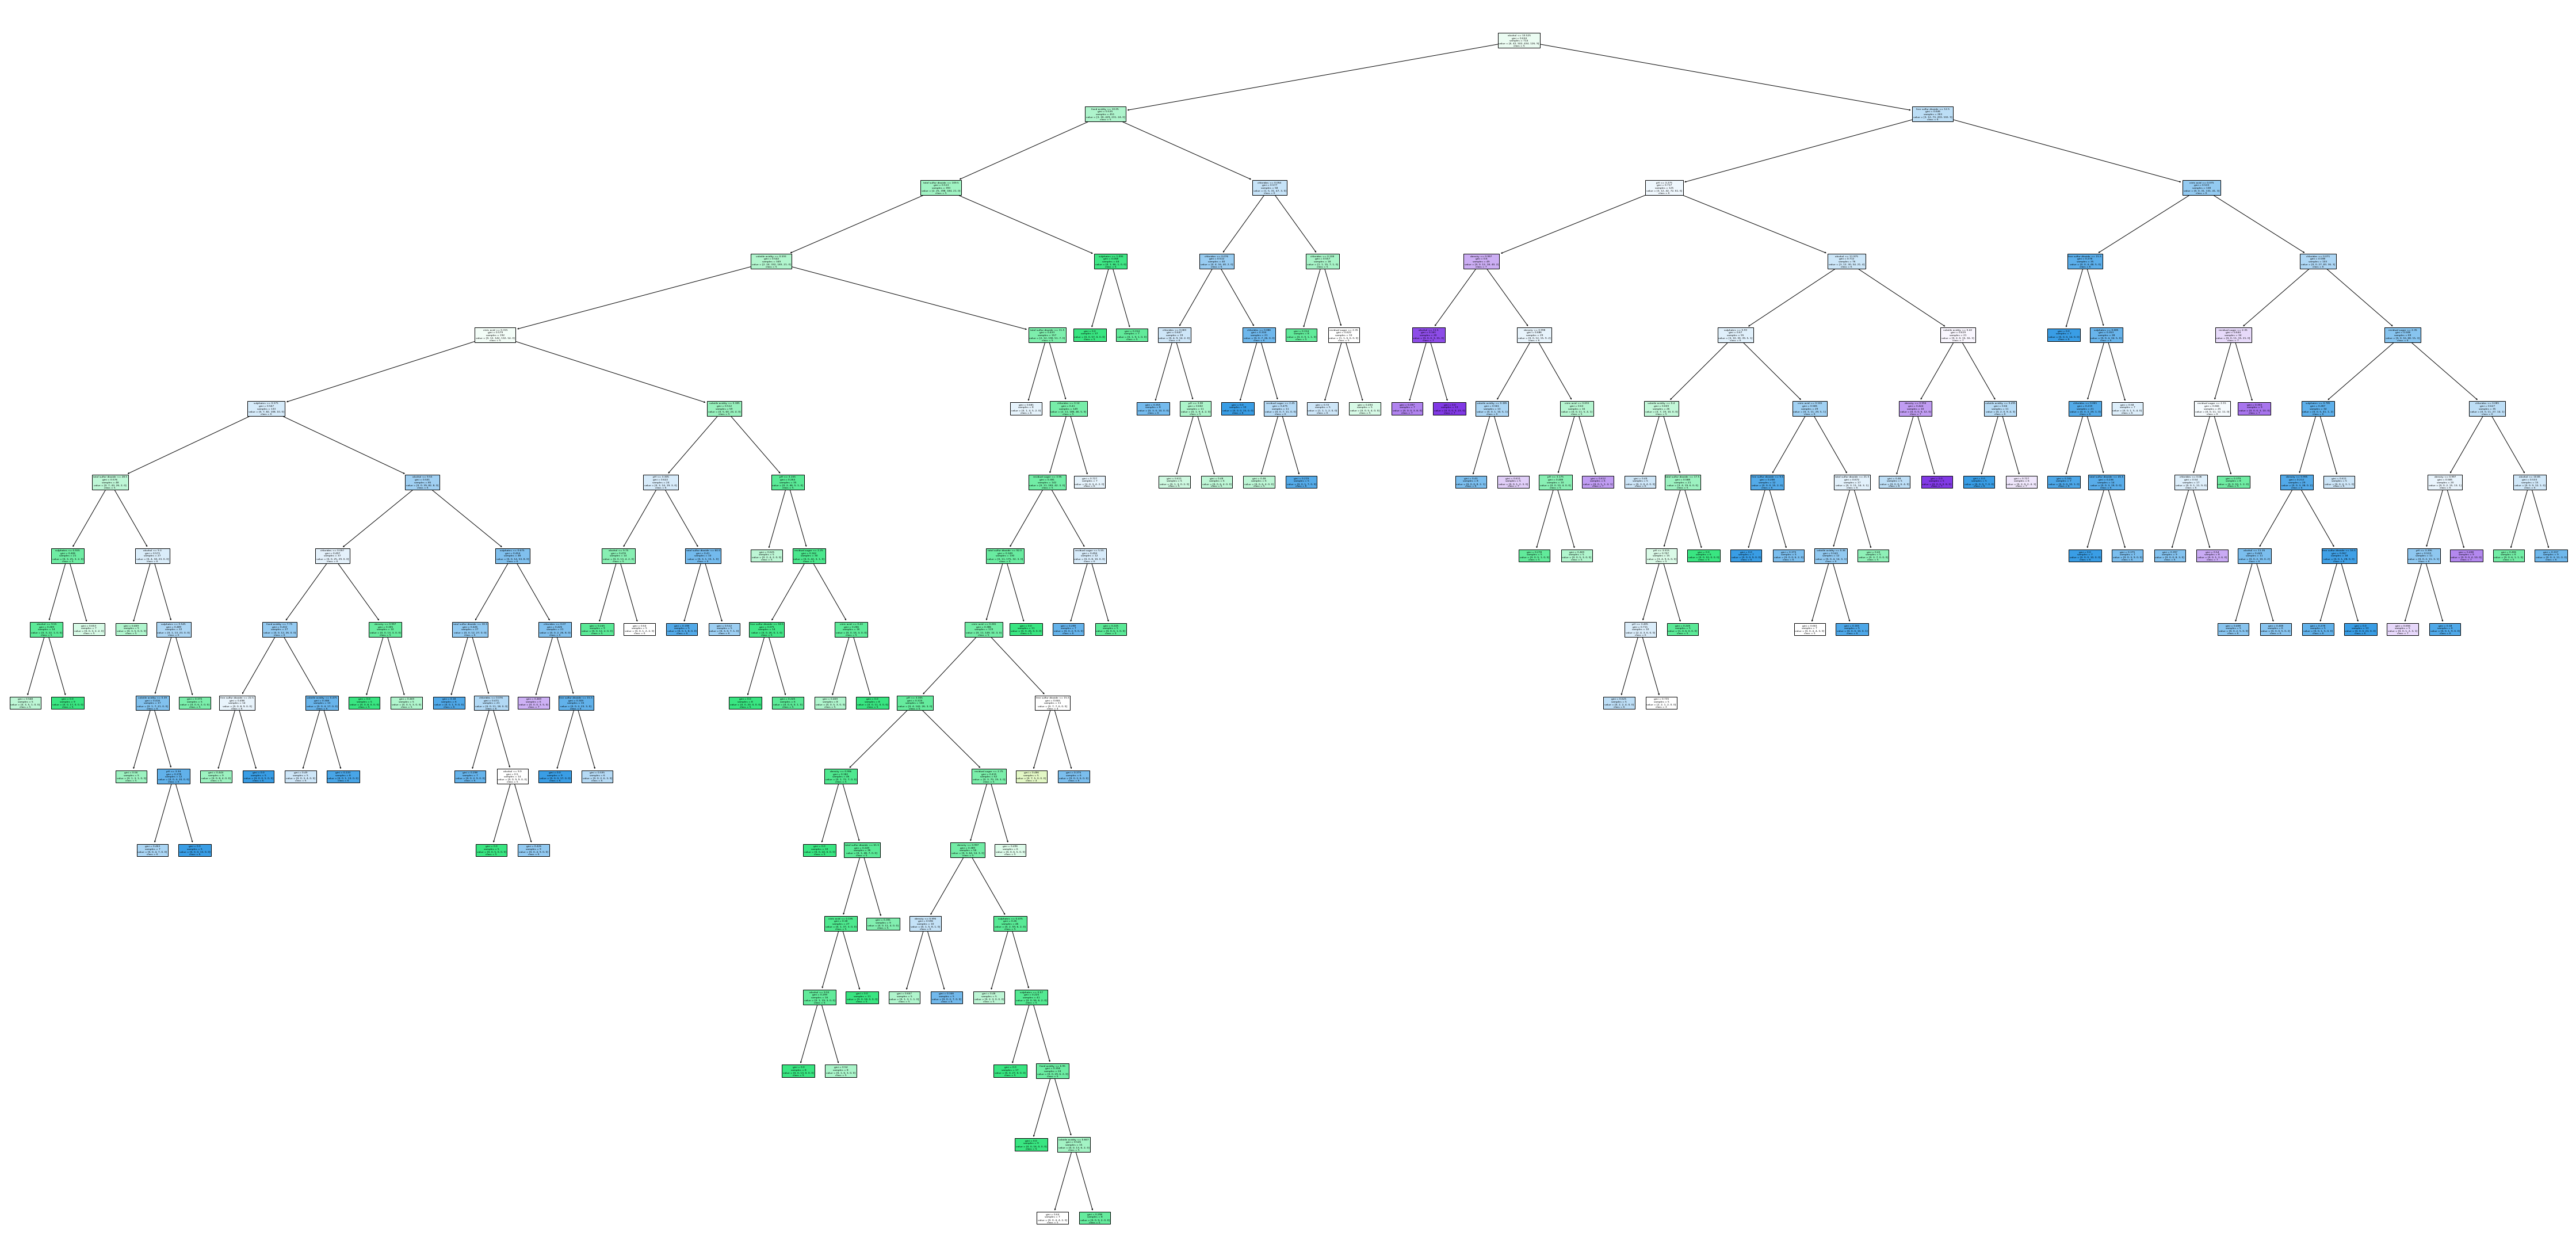

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['3','4','5','6','7',"8"],filled=True);

In [31]:
rf_best.feature_importances_

array([0.05442611, 0.1103956 , 0.06192142, 0.05448652, 0.0609836 ,
       0.05707558, 0.10556326, 0.09869085, 0.06737734, 0.12912492,
       0.1999548 ])

In [32]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [33]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
10,alcohol,0.199955
9,sulphates,0.129125
1,volatile acidity,0.110396
6,total sulfur dioxide,0.105563
7,density,0.098691
8,pH,0.067377
2,citric acid,0.061921
4,chlorides,0.060984
5,free sulfur dioxide,0.057076
3,residual sugar,0.054487
